In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

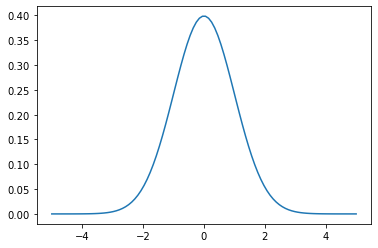

In [7]:
x = np.linspace(-5,5,100)
y = stats.norm.pdf(x,0,1)
plt.plot(x,y)

In [10]:
x = 50 + 5*np.random.randn(10000)

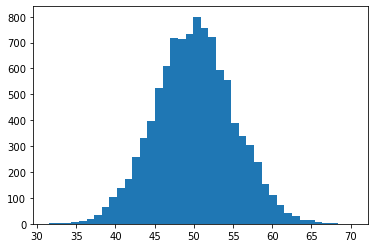

In [14]:
plt.hist(x, bins=40)
plt.show()

In [15]:
print(np.mean(x), np.std(x))

50.09524545937045 5.0277380296063585


In [16]:
print(np.median(x))

50.084806385766356


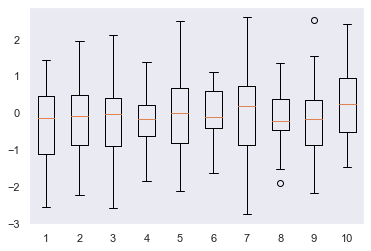

In [29]:
# box plot
import seaborn as sns
sns.set()
x = np.zeros((30,10))
for i in range(10):
    x[:,i] = np.random.randn(30)
    
plt.boxplot(x)
plt.grid()
plt.show()

In [32]:
# Choose random pieces from a list
a = ['the', 'dog',' ran', 'fast', 'and', 'ate,', 'popcorn']
b = []
for i in range(10):
    b.append(np.random.choice(a))
    
print(' '.join(b))

popcorn ate,  ran and ate, popcorn fast  ran popcorn  ran


Central limit theorem

Text(0.5, 0, 'Sample Size')

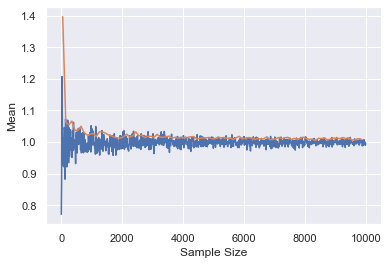

In [61]:
s = np.linspace(3,10000,1000)
x = [np.mean(np.random.randn(int(i))) for i in s]
x = np.array(x)
#std = [np.std(np.random.randn(int(i))) for i in s]
#plt.plot(s,x,'.')
s_e = np.arange(0,10000,100)
s_c = np.arange(50,10000-50,100)
s_v = np.zeros(s_c.shape)
for i in range(len(s_c)):
    msk = (s >= s_e[i]) & (s < s_e[i+1])
    s_v[i] = np.std(x[msk])
    
plt.plot(s,std)
plt.plot(s_c,1+s_v)
plt.ylabel('Mean')
plt.xlabel('Sample Size')

Text(0.5, 1.0, 'Mean estimate of Guassian')

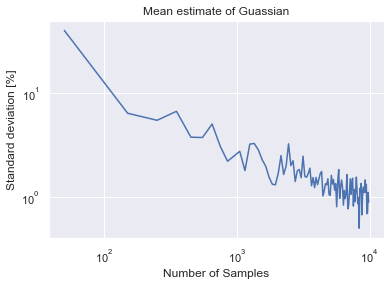

In [65]:
plt.loglog(s_c,s_v*100)
plt.xlabel('Number of Samples')
plt.ylabel('Standard deviation [%]')
plt.title('Mean estimate of Guassian')

In [137]:
# students t-test
from scipy.stats import ttest_ind, ttest_rel
#np.random.seed(1)
x = 5*np.random.randn(100) + 50
y = 5*np.random.randn(100) + 52
sta, p = ttest_ind(x,y)
print(sta,p)

-3.765432088584111 0.00021913038727348845


In [138]:
sta, p = ttest_rel(x,y)
print(sta,p)

-3.549460002221965 0.0005923101387563802


In [150]:
# Power analysis
from statsmodels.stats import power
analysis = power.TTestIndPower()

effect = 0.8
alpha = 0.01
power = 0.8
Nsamp = None
N = analysis.solve_power(effect, power=power, nobs1=Nsamp, ratio=1.0, alpha=alpha)
print('Sample size: {:3.1f}'.format(N))

effect = 0.5
alpha = 0.05
power = 0.99
Nsamp = None
N = analysis.solve_power(effect, power=power, nobs1=Nsamp, ratio=1.0, alpha=alpha)
print('Sample size: {:3.1f}'.format(N))

Sample size: 38.2
Sample size: 147.9


In [159]:
# Heat map of sample size for varying effect and power
alpha = 0.05
power = np.linspace(.5,1,100)
effect = np.linspace(.1,2,110)
[P, E] = np.meshgrid(power,effect)
N = np.zeros(P.shape)
P.shape
for p in range(len(power)):
    for e in range(len(effect)):
        N[e,p] = analysis.solve_power(E[e,p], power=P[e,p], nobs1=None, ratio=1.0, alpha=alpha)



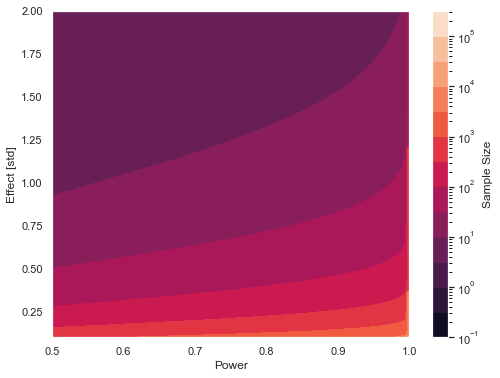

In [184]:
from numpy import ma
from matplotlib import ticker, cm, colors

fig, ax = plt.subplots(figsize=(8,6))

lev_exp = np.arange(np.floor(np.log10(N.min())-1),
                   np.ceil(np.log10(N.max())+1),.5)
levs = np.power(10, lev_exp)
#cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

cs = ax.contourf(P, E, N, levs, norm=colors.LogNorm())

cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Sample Size')
plt.ylabel('Effect [std]')
plt.xlabel('Power')
plt.show()

        

## Tolerance Interval for data sample, with confidence

In [206]:
# Ttolerance interval with a confidence percentage!
np.random.seed(1)
data = 5 * np.random.randn(100) + 50
# specify degrees of freedom
n = len(data)
dof = n - 1
# specify data coverage
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = stats.norm.ppf(prop_inv)
print('Gaussian critical value: %.3f (coverage=%d%%)' % (gauss_critical, prop*100))
# specify confidence
prob = 0.99
prop_inv = 1.0 - prob
chi_critical = stats.chi2.ppf(prop_inv, dof)
print('Chi-Squared critical value: %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob*100,
dof))
# tolerance
interval = np.sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
print('Tolerance Interval: %.3f' % interval)
# summarize
data_mean = np.mean(data)
lower, upper = data_mean-interval, data_mean+interval
print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper,
prop*100, prob*100))

Gaussian critical value: -1.960 (coverage=95%)
Chi-Squared critical value: 69.230 (prob=99%, dof=99)
Tolerance Interval: 2.355
47.95 to 52.66 covers 95% of data with a confidence of 99%
